In [1]:
#-*- coding:utf-8 -*-
import jieba
import sys
import os
import pandas as pd
from string import digits
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

### 建立function --> fileinpath()
### 使用glob模組將路徑./files資料夾內所有的文本txt檔名稱讀進來
### 將這些txt檔名稱儲存到textfile這個list

In [2]:
import os
import glob
def textfile():
    files = glob.glob("./letterto shareholders2/*橘子*.txt")
    return files
textfile=textfile()
textfile

['./letterto shareholders2\\2013橘子致股東.txt',
 './letterto shareholders2\\2014橘子致股東.txt',
 './letterto shareholders2\\2015橘子致股東.txt',
 './letterto shareholders2\\2016橘子致股東.txt',
 './letterto shareholders2\\2017橘子致股東.txt']

### 自定義jieba字典，存檔到dict.txt

In [3]:
dictlist = ['大同股份有限公司','公允價值','財務報表','林蔚山','信用評等']
d = open('dict.txt','w+',encoding='utf8')
for i in dictlist:
    d.write(i+'\n')
d.close()
jieba.load_userdict('dict.txt')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\USER\AppData\Local\Temp\jieba.cache
Loading model cost 2.171 seconds.
Prefix dict has been built succesfully.


### 定義停止詞與要剔除的特殊符號

In [4]:
stopwords = ['107','2017',':','2018','2035','到','為主','都','面對','／','尤其','企業','影響','機電','原物','產品','主要','同時','加上','柒萬元','同期','逐步','四年','億陸仟','六年','五年','受到','另外','貨幣','進行','三年','單位','汽車','紙業','作業','目前','公司','年度','隨著','各位','方面','台北市','萬元','濕紙','市場','本期','士林','衡量','伍拾','鋼材','馬達','仟元','台幣','拋光','稅後','萬元','馬達','107','2017',':','2018','2035','電廠','出租','內容','延伸','推出','分別','五年','行情','品牌','使用','突破','媒體','取得','兩岸','美元','生活','今年','元月','逐漸','領域','內容','成果','月份','推出','費用','取得','資訊','原料','一年','包含','春節','每桶','巴西','情資','用戶','前年','全力','建立','認證','流量','會員','去年','改版','引擎','年樂利','社群','台港澳','使用者','資安','果核','會員數','組件','群俠','玩法','儲能','企業社','人林','週年','仍須','七年','並以','單體','仍將','化生','之重','之數據','主義國家','中旬','英國','脫歐','澳洲','設備','化學產品','中油','合宜','打造','情境','到','引進','便利商店','實力','四大','天即','受惠','園區','商事','全亞洲','全民','代理','人數','事前','如鹽','上線','天堂','商圈','智通','零售','英雄','觸角','萬人','富錦街','能源管理','威肯','代收','油公司','更積','所有','節能','減碳','全產','新三輕','全銷','新營','工廠','為主','反觀','三十八','休閒','下同','七十年','新營廠','下油','下油價','都','一佰','面對','為','萬餘元','廠歲','輕裂','；','：','年','執照','四年','印度','加工品','億四仟','度','東南亞','全方位','全網','全生態','億次','酷瞧','貝果','電商','群募','樂利','新媒體','天貓','夥伴','日本','更','個體','互動式','鋼鐵產業','互動娛','豐富','影音','服務事業','之太陽能','免費','中華網','收為','家電','十一月','億萬餘元','食品','聚酯','原油','共生','華越','必須','漿價','紙張','一佰','第四季','億一仟','四佰萬元','九佰萬元','二佰萬元','來','用','了','略','目前','然而','無論','雖然','開始','超過','／','尤其','，','（','）','的','由','較','與','達','此外','致力','約','等','相關','至於','第','關於','雖','第一季','萬元','萬','這些','這樣','近','公司','發展','年度','持續','提供','發展','主要','影響','我們','大同','智冠','台紙','台苯','榮剛','未來','先生','因素','台幣','台灣','事業','市場','產品','產業','應用','成長','經濟','企業','億元','全年','可能','受到','方面','加上','以及','已經','萬噸','同時','年月日','年','月','日','其中','苯乙烯','乙苯','各項','遊戲','各位','手遊','化工','模具','支付','永續','美國','電子','服務','平台','合作','將持續','決議','紙器','甲苯','二甲苯','紙業','智慧','集團','創新','研發','多元','旗下','公噸','整合','開發','能源','廣告','技術','科技','授權','布局','紙漿','紙產線','氧化','航太產業','正式','一頁','預期','預期','三家','其年','電網','因此','智付','銷媒體','位內容','加值','玩家','因此','油氣產業','航太產業','鋼品','球場','稅後','使得','不僅','商城','吳玉堂','中國國','半導體','官學','雲端','抗菌','美洲','病毒','卡亦持續','億柒仟','不動產處','機構','內政部','冰箱','智能化','半導體','公寓','飲品','旅館','韓國','以上','街上','文青','浪潮','故事','服務據點','椰子','機械','太陽能','美術','都市','創意','失業率','市府','安全','審議','土地','位廣告','仟元','年產','減排','智能','能效','自動化','工程','基產品','工業','木漿','苛性','液體','第三季','龍井','住宅','化學品','固體','基地','平板','建案','建照','氯化','碳酸','石化','七月','仍將','機電','之家電','網路','戲產品','手機','除了','第三方','行動','除了','不同','包括','可以','智慧型','線上','裝置','軟體','油品','飛機','鋼廠','油氣','之淨現','橘子','伺服器','劉柏園','樂點','運團隊','一研','三國','之星','三成','優化','優化近','兩成','萬公噸','乙烯','一佰萬元','三佰萬元','第二季','二年','五佰萬元','及其','生產廠','膠皮','萬碼','一佰','三年','上半年','越南','別墅','華越','高爾夫','之一','别墅','打球','木片','一消','一長','三期','二期','五期','亦需','原油','大樓','汽電','油價','石化','一本初衷','一般','七月','下半年','並出','並在','節能','期以','健康','動能','機電','歡樂','樂利','之家電','數據','改版','之機','手機','娛樂','數位','之產品給','網路','今後對','戲產品','動遊戲','中華網','幹線','工具','鋼材','航空','商務','航太','高值','高值化','改版','引擎','年樂利','社群','台港澳','使用者','資安','果核','會員數','組件','群俠','玩法','儲能','企業社','人林','週年','仍須','七年','並以','單體','仍將','化生','之重','之數據','主義國家','中旬','英國','脫歐','澳洲','設備','化學產品','中油','合宜','打造','情境','到','引進','便利商店','實力','四大','天即','受惠','園區','商事','全亞洲','全民','代理','人數','事前','如鹽','上線','天堂','商圈','智通','零售','英雄','觸角','萬人','富錦街','能源管理','威肯','代收','油公司','更積','所有','節能','減碳','全產','新三輕','全銷','新營','工廠','為主','反觀','三十八','休閒','下同','七十年','新營廠','下油','下油價','都','一佰','面對','為','萬餘元','廠歲','輕裂','；','：','年','執照','四年','印度','加工品','億四仟','度','東南亞','全方位','全網','全生態','億次','酷瞧','貝果','電商','群募','樂利','新媒體','天貓','夥伴','日本','更','個體','互動式','鋼鐵產業','互動娛','豐富','影音','服務事業','之太陽能','免費','中華網','收為','家電','十一月','億萬餘元','食品','聚酯','原油','共生','華越','必須','漿價','紙張','一佰','第四季','億一仟','四佰萬元','九佰萬元','二佰萬元','來','用','了','略','目前','然而','無論','雖然','開始','超過','／','尤其','，','（','）','的','由','較','與','達','此外','致力','約','等','相關','至於','第','關於','雖','第一季','萬元','萬','這些','這樣','近','公司','發展','年度','持續','提供','發展','主要','影響','我們','大同','智冠','台紙','台苯','榮剛','未來','先生','因素','台幣','台灣','事業','市場','產品','產業','應用','成長','經濟','企業','億元','全年','可能','受到','方面','加上','以及','已經','萬噸','同時','年月日','年','月','日','其中','苯乙烯','乙苯','各項','遊戲','各位','手遊','化工','模具','支付','永續','美國','電子','服務','平台','合作','將持續','決議','紙器','甲苯','二甲苯','紙業','智慧','集團','創新','研發','多元','旗下','公噸','整合','開發','能源','廣告','技術','科技','授權','布局','紙漿','紙產線','氧化','航太產業','正式','一頁','預期','預期','三家','其年','電網','因此','智付','銷媒體','位內容','加值','玩家','因此','油氣產業','航太產業','鋼品','球場','稅後','使得','不僅','以上','太陽能','美術','位廣告','仟元','基產品','工業','木漿','苛性','液體','第三季','龍井','住宅','化學品','固體','基地','平板','建案','建照','氯化','碳酸','石化','七月','仍將','機電','之家電','網路','戲產品','手機','除了','第三方','行動','除了','不同','包括','可以','智慧型','線上','裝置','軟體','油品','飛機','鋼廠','油氣','之淨現','橘子','伺服器','劉柏園','樂點','運團隊','一研','三國','之星','三成','優化','優化近','兩成','萬公噸','乙烯','一佰萬元','三佰萬元','第二季','二年','五佰萬元','及其','生產廠','膠皮','萬碼','一佰','三年','上半年','越南','別墅','華越','高爾夫','之一','别墅','打球','木片','一消','一長','三期','二期','五期','亦需','原油','大樓','汽電','油價','石化','一本初衷','一般','七月','下半年','並出','並在','節能','期以','健康','動能','機電','歡樂','樂利','之家電','數據','改版','之機','手機','娛樂','數位','之產品給','網路','今後對','戲產品','動遊戲','中華網','幹線','工具','鋼材','航空','商務','航太','高值','高值化']
puncs = '！？｡＂＃＄％＆＇（）＊＋，－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏.。'

### 將textfile(list)內的文本讀取進來
### 使用jieba斷詞並加入corpus(list)之中
### 一個文本就是一個string，斷詞用空白隔開

In [5]:
# Take each line in target_txt as an unique document
# Cut each line for trarget_txt, and collect it in corpus.

corpus=[]
corpus_1=[]
jieba.load_userdict('dict.txt')
for t in textfile:
    f = open(t,'r', encoding ="utf-8")
    r = f.read()
    remove_digits = str.maketrans('', '', digits)
    r = r.translate(remove_digits)
    r_list = jieba.cut(r, cut_all=False)
    r_list = list(r_list)
    
    for i in range(40):
        #好像多刪幾次就會成功了= =
        #我重複刪5次
        #如果再出現可以再增加次數
        for w in r_list:
            if (w in stopwords) or (w in puncs) or (w < '\u4e00') or (w > '\u9fff'):
                r_list.remove(w)
    st=" ".join(r_list)
    corpus.append(st)
corpus

['壹 致股 東報 告書 親愛的 股東 女士 們 根據 國際產業 研究 報告 全球 規模 億 行動遊 戲市場 規模 逾 億 率 最具 掌握 全球 化 趨勢 於 領先 引導 轉型 貫徹 行動化 方針 並 於 陸續 展現 化成 果 合 併 營業 收入 達新 各營 運業務 穩健 締造 歷史 新高 記錄 在 有效 管控 下 營業 大幅 減少 合 併 營業 利益 所得 稅費用 合 併 稅 後 淨利 每股 盈餘為 元 成功 轉虧 為盈 獲利 亦 大幅 躍進 展望 佈 局行動 創 新集 團 能量 季合 併 營業 收入 新 合 併 稅後淨 利為 首季 營收及 去年同期 均 水準 整體 表現 穩健 自 製 研 發 營運 通路 齊發 衝刺 團隊 玩酷 成功 自 製 手 遊 產 品 另 發團隊 紅門 自 製 手 遊 已有 多 家海內 外廠 商積 極爭 取授 權中 手遊營 明星 已 於 季衝 進台 灣手 遊市 場營 收前 名 成績 亮眼 另一手 遊營 秘密 啟動 風潮 搭載 人氣 米 各 說 自 製 研 發 手 遊 米 各 說 版 本 近期 將 版本 吸引 各 目光 服務樂點 拓展 貢獻 國際大廠 新作 鞏固 競爭 優勢 稱霸 經典長 青線 上 於 月底 版本 創下 新增 人次 最高 同上 人次 記錄 滿載 加開 大獲 好評 大廠 人 氣 科幻 動作線 上 大作 夢幻 於 接續 出擊 首度 攜手 網易 在 中國 擁有 高 知名度 及 關注 多 人 連線 對 戰遊戲 大作 權 預 計將 於 夏天 火熱 登場 卡領 先 國際 廣拓 業務 卡 表現 亮眼 加強 領先 管理系 統國際 標準 支付卡 標準 雙認證 並領 先 橫跨 和 手 機備 份 廣大 族群 兼顧 便利 高品質 秉持 創造 無限 基本 信念 期待 創造 消費者 股東 及員 工三贏 歡 樂 進而 實踐 對 股東 承諾 經營 使命 希望 股東能 繼續 給予 支持 在 此 謹致 上 最誠摯 謝忱 敬祝 大家 萬事 如意 闔 家 康泰 董事 長 經理 人 會計 主管 蘇信泓',
 '壹 致股 東報 告書 親愛的 股東 女士 們 根據 國際產業 研究 報告 全球 規模 億 行動遊 戲市場 規模 逾 億 率 最具 掌握 全球 化 趨勢 於 領先 引導 轉型 貫徹 行動化 方針 已陸續 展現 行動化 合 併 營業 收入 達新 業務 穩健 成水準 

### 訓練tfidf模型
### 將詞頻向量矩陣存到變數tfidf
### 將文字列表存到變數words

In [6]:
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)
words = vectorizer.get_feature_names()
print("len(words): ", len(words))

len(words):  960


In [7]:
print("tfidf.shape: ", tfidf.shape)
tfidf

tfidf.shape:  (5, 960)


<5x960 sparse matrix of type '<class 'numpy.float64'>'
	with 1387 stored elements in Compressed Sparse Row format>

### 將tfidf矩陣中>0.05的詞顯示出來

In [8]:
# check each document
for i in range(len(corpus)):
    print('----Document {0}----'.format(i))
    for j in range(len(words)):
        if tfidf[i,j] > 0.05:
            print(words[j], tfidf[i,j], i ,j)   

----Document 0----
並領 0.07983108767745302 0 27
中國 0.05346380981319412 0 28
主管 0.06440721888076655 0 33
亮眼 0.1288144377615331 0 41
人次 0.1288144377615331 0 46
人氣 0.07983108767745302 0 47
便利 0.06440721888076655 0 62
信念 0.05346380981319412 0 67
全球 0.07607988203301529 0 82
兼顧 0.07983108767745302 0 95
出擊 0.07983108767745302 0 99
利為 0.07983108767745302 0 106
利益 0.05346380981319412 0 107
創下 0.07983108767745302 0 115
創造 0.07607988203301529 0 123
加強 0.07983108767745302 0 127
加開 0.07983108767745302 0 129
動作線 0.07983108767745302 0 131
化成 0.07983108767745302 0 136
卡領 0.07983108767745302 0 140
及員 0.06440721888076655 0 146
取授 0.07983108767745302 0 152
另一手 0.07983108767745302 0 154
各營 0.07983108767745302 0 168
同上 0.06440721888076655 0 175
吸引 0.05346380981319412 0 180
商積 0.07983108767745302 0 189
啟動 0.07983108767745302 0 193
國際 0.05346380981319412 0 204
國際大廠 0.06440721888076655 0 208
團隊 0.05346380981319412 0 212
基本 0.06440721888076655 0 222
場營 0.07983108767745302 0 229
夏天 0.07983108767745302 0 234
外廠 0

召喚 0.0528788022714637 2 156
台上 0.0528788022714637 2 160
各事業 0.08532456944120638 2 165
吉室 0.0528788022714637 2 174
同時積 0.0528788022714637 2 176
同步 0.0528788022714637 2 178
名國際 0.0528788022714637 2 179
商機 0.0528788022714637 2 188
商行 0.0528788022714637 2 190
國內 0.08532456944120638 2 200
國內產 0.0528788022714637 2 201
國外 0.0528788022714637 2 202
國家級 0.0528788022714637 2 203
國際 0.2124813009598641 2 204
國際夥 0.0528788022714637 2 206
圖板 0.0528788022714637 2 210
團體 0.0528788022714637 2 213
地展 0.0528788022714637 2 216
地營 0.0528788022714637 2 218
地遊 0.0528788022714637 2 220
堅強 0.0528788022714637 2 225
增溫 0.0528788022714637 2 233
多樣 0.0528788022714637 2 240
多螢 0.0528788022714637 2 242
好物 0.0528788022714637 2 260
好食 0.0528788022714637 2 262
娛樂新 0.0528788022714637 2 265
宣布 0.0528788022714637 2 275
密集 0.0528788022714637 2 277
實體 0.1057576045429274 2 285
射擊 0.0528788022714637 2 287
將台灣 0.0528788022714637 2 288
將躍升 0.0528788022714637 2 296
將透過 0.0528788022714637 2 297
專營 0.0528788022714637 2 300
專賣 0.052

報酬 0.05579479903863298 4 227
增加 0.06286763307025975 4 231
外企 0.05579479903863298 4 235
大躍進 0.05579479903863298 4 253
奠下 0.05579479903863298 4 257
姐妹 0.05579479903863298 4 264
子公司 0.09002978510349338 4 267
實務 0.05579479903863298 4 280
實用 0.05579479903863298 4 281
將導入 0.05579479903863298 4 290
將積 0.05579479903863298 4 294
將結 0.05579479903863298 4 295
將進 0.05579479903863298 4 298
專屬 0.05579479903863298 4 299
對外 0.05579479903863298 4 302
導向 0.05579479903863298 4 306
局國際 0.05579479903863298 4 310
展市場 0.05579479903863298 4 313
展望 0.05317304138540359 4 314
工作 0.05579479903863298 4 318
已成 0.05579479903863298 4 319
年國家級 0.05579479903863298 4 333
年增 0.05579479903863298 4 334
年將 0.05579479903863298 4 335
年底 0.09002978510349338 4 336
年手 0.05579479903863298 4 337
年樂點 0.05579479903863298 4 338
年酷 0.05579479903863298 4 339
延續 0.05579479903863298 4 348
建及 0.05579479903863298 4 349
形塑 0.05579479903863298 4 358
形象 0.05579479903863298 4 359
影遊 0.05579479903863298 4 362
循環 0.05579479903863298 4 366
愛護 0.0

### 將tfidf矩陣用pandas套件將結果整理為DataFrame格式

In [9]:
df_tfidf = pd.DataFrame(words,columns=['words'])
for i in range(tfidf.shape[0]):
    docnumber=textfile[i]
    df_tfidf[docnumber] = pd.DataFrame(tfidf.toarray()[i].T)

df_tfidf

,words,./letterto shareholders2\2013橘子致股東.txt,./letterto shareholders2\2014橘子致股東.txt,./letterto shareholders2\2015橘子致股東.txt,./letterto shareholders2\2016橘子致股東.txt,./letterto shareholders2\2017橘子致股東.txt
0,一城,0.000000,0.000000,0.000000,0.054542,0.000000
1,一條,0.000000,0.000000,0.000000,0.000000,0.055795
2,一步,0.000000,0.000000,0.000000,0.000000,0.055795
3,一貫,0.000000,0.000000,0.000000,0.000000,0.055795
4,三創,0.000000,0.000000,0.000000,0.054542,0.000000
5,三方,0.000000,0.000000,0.000000,0.054542,0.000000
6,三縣,0.000000,0.000000,0.000000,0.054542,0.000000
7,三贏,0.000000,0.000000,0.042662,0.044004,0.000000
8,三高紀錄,0.000000,0.000000,0.000000,0.054542,0.000000
9,上季,0.000000,0.066711,0.000000,0.000000,0.000000


In [10]:
def chinese(w):
    if (w < '\u4e00') or (w > '\u9fff') or (w in stopwords) or (w in puncs) :
        return 0
    else:
        return 1
df_tfidf=df_tfidf[df_tfidf['words'].apply(chinese) !=0]
df_tfidf

,words,./letterto shareholders2\2013橘子致股東.txt,./letterto shareholders2\2014橘子致股東.txt,./letterto shareholders2\2015橘子致股東.txt,./letterto shareholders2\2016橘子致股東.txt,./letterto shareholders2\2017橘子致股東.txt
0,一城,0.000000,0.000000,0.000000,0.054542,0.000000
1,一條,0.000000,0.000000,0.000000,0.000000,0.055795
2,一步,0.000000,0.000000,0.000000,0.000000,0.055795
3,一貫,0.000000,0.000000,0.000000,0.000000,0.055795
4,三創,0.000000,0.000000,0.000000,0.054542,0.000000
5,三方,0.000000,0.000000,0.000000,0.054542,0.000000
6,三縣,0.000000,0.000000,0.000000,0.054542,0.000000
7,三贏,0.000000,0.000000,0.042662,0.044004,0.000000
8,三高紀錄,0.000000,0.000000,0.000000,0.054542,0.000000
9,上季,0.000000,0.066711,0.000000,0.000000,0.000000


### 儲存到excel --> tfidf.xlsx
### 將df_tfidf表格存到sheet -->tfidf_1

In [11]:
writer = pd.ExcelWriter('tfidf2.xlsx')
df_tfidf.to_excel(writer,'tfidf_1')
writer.save()

In [12]:
tfarray=tfidf.toarray()
tfarray

array([[0.        , 0.        , 0.        , ..., 0.07983109, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.06671112,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.05454193, 0.        , 0.        , ..., 0.        , 0.        ,
        0.05454193],
       [0.        , 0.0557948 , 0.0557948 , ..., 0.        , 0.        ,
        0.        ]])

### 使用CountVectorizer()方法
### 統計corpus之中個別文本的文字次數
### 用pandas套件將結果整理為DataFrame格式
### column-->words是所有出現的文字
### 右邊每一個column都是一個文本的文字出現次數統計

In [13]:
vec = CountVectorizer()
X = vec.fit_transform(corpus)
df = pd.DataFrame(vec.get_feature_names(),columns=['words'])
for i in range(X.shape[0]):
    docnumber='doc'+str(i+1)+'_tfdif'
    df[docnumber] = pd.DataFrame(X.toarray()[i].T)
df

,words,doc1_tfdif,doc2_tfdif,doc3_tfdif,doc4_tfdif,doc5_tfdif
0,一城,0,0,0,1,0
1,一條,0,0,0,0,1
2,一步,0,0,0,0,1
3,一貫,0,0,0,0,1
4,三創,0,0,0,1,0
5,三方,0,0,0,1,0
6,三縣,0,0,0,1,0
7,三贏,0,0,1,1,0
8,三高紀錄,0,0,0,1,0
9,上季,0,1,0,0,0


In [14]:
df.head()

,words,doc1_tfdif,doc2_tfdif,doc3_tfdif,doc4_tfdif,doc5_tfdif
0,一城,0,0,0,1,0
1,一條,0,0,0,0,1
2,一步,0,0,0,0,1
3,一貫,0,0,0,0,1
4,三創,0,0,0,1,0


### 建立chinese(w)方法，判斷輸入的w是不是在漢字區間，是 -->回傳1    不是-->回傳0
 - 使用unicode編碼剔除不是漢字的項目
 - 漢字範圍u4e00- u9fff
 
### 判斷df表格中是漢字的項目才保留下來

 - df['words'].apply(chinese)會將df表格中'words'這個column內的所有項目作為w執行chinese(w)方法，會回傳0或1
 - df['words'].apply(chinese) !=0判斷回傳不等於0的項目(漢字)
 - df[df['words'].apply(chinese) !=0]用df[...]叫出所有符合上述判斷的項目的rows 
 - 將這個結果重新儲存回df表格
 
### 這樣df表格中就只會剩下漢字的項目 

In [15]:
def chinese(w):
    if (w < '\u4e00') or (w > '\u9fff'):
        return 0
    else:
        return 1
df=df[df['words'].apply(chinese) !=0]
df

,words,doc1_tfdif,doc2_tfdif,doc3_tfdif,doc4_tfdif,doc5_tfdif
0,一城,0,0,0,1,0
1,一條,0,0,0,0,1
2,一步,0,0,0,0,1
3,一貫,0,0,0,0,1
4,三創,0,0,0,1,0
5,三方,0,0,0,1,0
6,三縣,0,0,0,1,0
7,三贏,0,0,1,1,0
8,三高紀錄,0,0,0,1,0
9,上季,0,1,0,0,0


### 儲存到excel --> wordscount.xlsx
### 將df表格存到sheet -->wordscount_1

In [16]:
writer = pd.ExcelWriter('wordscount2.xlsx')
df.to_excel(writer,'wordscount_1')
writer.save()

### 全部文字的dict建立文字雲

In [17]:
df['sum']=df.sum(axis=1)
wordDict=dict(zip(df['words'], df['sum']))
wordDict

{'一城': 1,
 '一條': 1,
 '一步': 1,
 '一貫': 1,
 '三創': 1,
 '三方': 1,
 '三縣': 1,
 '三贏': 2,
 '三高紀錄': 1,
 '上季': 1,
 '上市': 1,
 '上檔': 1,
 '下一波': 1,
 '下台': 1,
 '不斷': 3,
 '並將': 1,
 '並成': 1,
 '並持續': 1,
 '並為': 1,
 '並發動': 1,
 '並積': 1,
 '並與': 3,
 '並計畫': 1,
 '並透過': 1,
 '並進': 2,
 '並適': 1,
 '並隨著': 1,
 '並領': 1,
 '中國': 4,
 '串接': 2,
 '串連': 2,
 '主力': 2,
 '主打': 1,
 '主管': 2,
 '之際': 1,
 '事業體': 1,
 '互動': 1,
 '五成': 1,
 '亞洲級': 1,
 '交易': 1,
 '享受': 1,
 '亮眼': 3,
 '亮麗': 1,
 '亮麗佳績': 1,
 '亮點': 1,
 '人才': 1,
 '人次': 3,
 '人氣': 1,
 '人氣遊': 1,
 '今年初': 1,
 '代運營商': 1,
 '以來': 2,
 '以國際化': 1,
 '以年': 1,
 '以樂點': 1,
 '以點': 1,
 '伙伴': 1,
 '伴攜手': 1,
 '佔率': 1,
 '作品': 1,
 '使命': 5,
 '來襲': 1,
 '便利': 2,
 '便捷': 1,
 '促使': 1,
 '促進': 1,
 '保養': 1,
 '信念': 3,
 '值得': 1,
 '停車': 1,
 '傳奇': 1,
 '價值': 2,
 '優勢': 4,
 '優化客': 1,
 '優認證': 1,
 '優質': 1,
 '元年': 2,
 '先機': 1,
 '內部將': 1,
 '全力以赴': 1,
 '全台首': 1,
 '全新': 5,
 '全球': 12,
 '全集': 1,
 '全面': 5,
 '全體': 1,
 '兩性': 1,
 '公共': 1,
 '共同': 1,
 '共同努力': 1,
 '共通': 1,
 '具串': 1,
 '具潛力': 1,
 '具體': 2,
 '典線': 1,
 '兼顧': 1,
 '再度': 4,


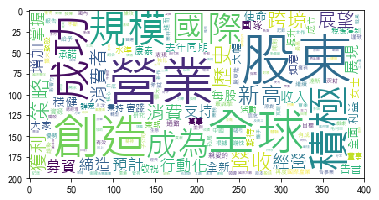

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

font = r"C:/Users/USER/Desktop/three/msjh.ttc"
wordcloud = WordCloud(font_path = font, background_color="white")
wordcloud.fit_words(wordDict)
plt.imshow(wordcloud)

In [19]:
ten = sorted(wordDict.items(), key=lambda x: x[1],reverse = True)
ten[:10]

[('股東', 16),
 ('營業', 14),
 ('全球', 12),
 ('創造', 11),
 ('成功', 9),
 ('積極', 9),
 ('規模', 9),
 ('國際', 8),
 ('成為', 8),
 ('新高', 8)]

In [20]:
data = []
for t in ten[:10]:
    data.append(t[1])
label = []
for t in ten[:10]:
    label.append(t[0])

([<matplotlib.axis.XTick at 0xfa7f748>,
 <a list of 10 Text xticklabel objects>)

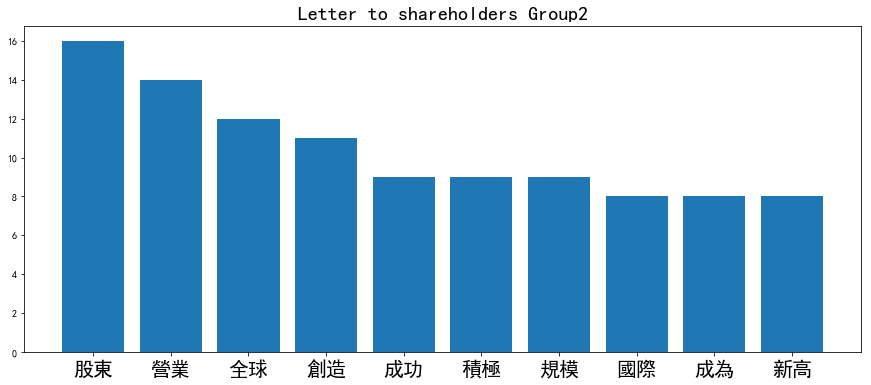

In [21]:
plt.figure(figsize=(15,6))
plt.bar(range(0,10),data)
plt.title("Letter to shareholders Group2",fontsize=20)
plt.xticks(range(0,10),label,fontsize=20)

In [22]:
from sklearn.decomposition import PCA as sklearnPCA
import matplotlib.pyplot as plt
X = tfidf.toarray()
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X)
Y_sklearn

array([[-0.55901237, -0.32713751],
       [-0.35755082, -0.14738023],
       [-0.0014319 ,  0.60586828],
       [ 0.25946111,  0.37136949],
       [ 0.65853399, -0.50272004]])

No handles with labels found to put in legend.


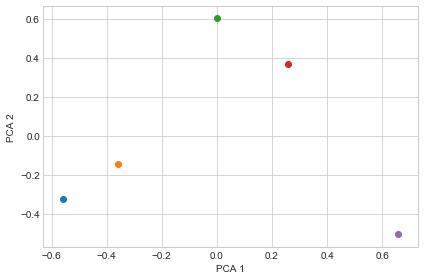

In [23]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    #for lab, col in zip(('low', 'medium', 'high'),
                        #('red', 'green','orange')):
    for i in range(len(Y_sklearn)):

        plt.scatter(Y_sklearn[i][0], Y_sklearn[i][1])
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

In [24]:
from sklearn.cluster import KMeans

In [25]:
kmeans = KMeans(n_clusters = 2)
X_clustered = kmeans.fit_predict(Y_sklearn)

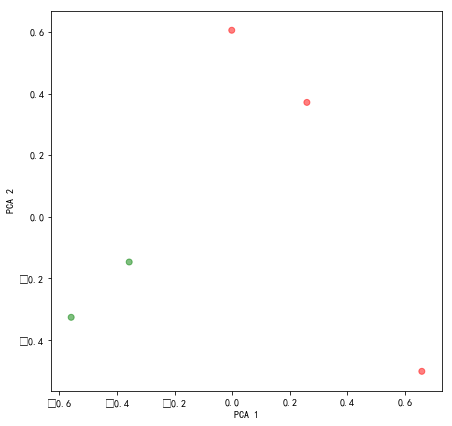

In [26]:
#Define our own color map
LABEL_COLOR_MAP = {0:'r', 1: 'g', 2: 'b', 3: 'y'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(Y_sklearn[:,0],Y_sklearn[:,1], c= label_color, alpha=0.5) 
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()